In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import io
import torch
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

from orthogonal_dfa.l_star.examples.bernoulli_parity import BernoulliRegex
from orthogonal_dfa.l_star.structures import DecisionTreeLeafNode
from orthogonal_dfa.l_star.sampler import UniformSampler
from orthogonal_dfa.l_star.decision_tree_to_dfa import *
from orthogonal_dfa.utils.pdfa import batched_iterated_matrix_multiply

In [19]:
oracle = BernoulliRegex(0.6, 0, regex=r".*111111.*")

In [20]:
us = UniformSampler(40)

In [21]:
rng = np.random.default_rng(0)
np.mean([oracle.membership_query(us.sample(rng, alphabet_size=2)) for _ in range(1000)])

np.float64(0.447)

In [22]:
pst = PrefixSuffixTracker.create(
    us,
    np.random.default_rng(0),
    oracle,
    alphabet_size=2,
    num_prefixes=10_000,
    suffix_family_size=200,
    chi_squared_p_min=0.005,
    evidence_thresh=0.55,
    suffix_prevalence=0.05,
)
# dt = pst.extract_decision_tree()

Starting synthesis iteration with 10000 prefixes


Completing suffix family:   1%|1         | 2/199 [00:01<02:21,  1.40it/s]

Num states: 1; processing []


Prepending to all suffixes:   2%|2         | 4/200 [00:01<00:57,  3.41it/s]

Prepending to all suffixes:   2%|2         | 4/200 [00:01<01:03,  3.09it/s]

Num states: 2; processing [1]
Done
Num states: 2; processing [0]
Done
Extracted flat decision tree with 2 states
Best DFA has success rate on 'correct' states 0.5000


  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   5%|4         | 23/500 [00:01<00:21, 22.41it/s]

[0.672 0.982 0.99  0.99  0.984]


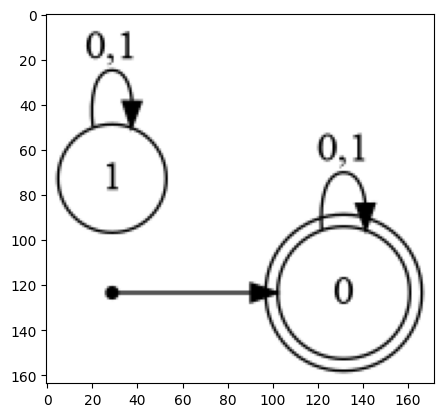

Starting synthesis iteration with 10500 prefixes
Num states: 1; processing []


Prepending to all suffixes:   3%|3         | 6/200 [00:01<00:32,  5.91it/s]

Prepending to all suffixes:   3%|3         | 6/200 [00:01<00:32,  5.98it/s]

Num states: 2; processing [1]


Prepending to all suffixes:   2%|2         | 5/200 [00:01<00:47,  4.06it/s]

Prepending to all suffixes:   2%|2         | 5/200 [00:01<00:48,  4.06it/s]

Num states: 3; processing [1, 1]
Done
Num states: 3; processing [0, 1]
Done
Num states: 3; processing [0]
Done
Extracted flat decision tree with 3 states
Best DFA has success rate on 'correct' states 0.5012


  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   3%|3         | 16/500 [00:01<00:31, 15.41it/s]

[0.226 0.666 0.974 0.988 0.988]


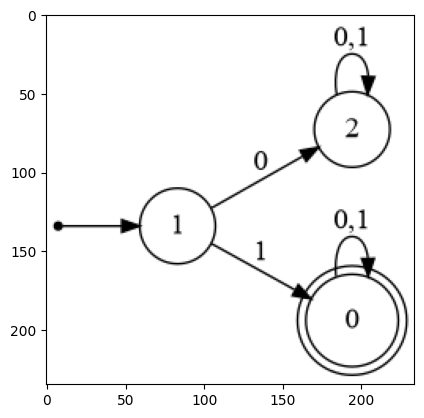

Starting synthesis iteration with 11000 prefixes
Num states: 1; processing []


Prepending to all suffixes:   2%|2         | 5/200 [00:01<00:42,  4.56it/s]

Prepending to all suffixes:   2%|2         | 5/200 [00:01<00:42,  4.62it/s]

Num states: 2; processing [1]


Prepending to all suffixes:   2%|2         | 5/200 [00:01<00:43,  4.47it/s]

Prepending to all suffixes:   2%|2         | 5/200 [00:01<00:42,  4.57it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:   2%|2         | 4/200 [00:01<01:05,  3.00it/s]

Prepending to all suffixes:   2%|2         | 4/200 [00:01<01:05,  2.99it/s]

Num states: 4; processing [1, 1, 1]


Prepending to all suffixes:   2%|1         | 3/200 [00:01<01:07,  2.93it/s]

Prepending to all suffixes:   2%|2         | 4/200 [00:01<01:06,  2.95it/s]

Num states: 5; processing [1, 1, 1, 1]


Prepending to all suffixes:   2%|2         | 4/200 [00:01<01:14,  2.64it/s]

Prepending to all suffixes:   2%|2         | 4/200 [00:01<01:06,  2.97it/s]

Num states: 6; processing [1, 1, 1, 1, 1]


Prepending to all suffixes:   2%|2         | 4/200 [00:01<01:07,  2.91it/s]

Prepending to all suffixes:   2%|2         | 4/200 [00:01<01:05,  2.97it/s]

Num states: 7; processing [1, 1, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1]
Done
Num states: 7; processing [0, 1]
Done
Num states: 7; processing [0]
Done
Extracted flat decision tree with 7 states
Best DFA has success rate on 'correct' states 0.9992
Achieved desired accuracy of 0.9; stopping synthesis


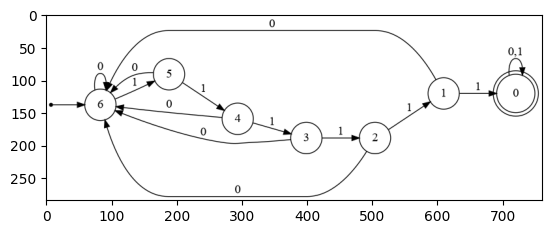

In [23]:
for dfa, results in counterexample_driven_synthesis(
    pst, min_state_size=0.01, additional_counterexamples=500, acc_threshold=0.9
):
    if results is not None:
        print(np.mean([r[0][-5:] for r in results], 0))
    plt.imshow(Image.open(io.BytesIO(dfa.show_diagram().draw(format="png"))))
    plt.show()

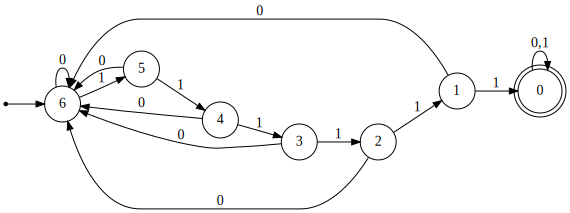

In [24]:
dfa